In [22]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
from sklearn.preprocessing import OneHotEncoder # Nominal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
## models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [23]:
df = pd.read_csv("clean_data.csv")

In [24]:
x = df.drop(labels=["Time_taken (min)"],axis=1)
y = df[["Time_taken (min)"]]

In [25]:
x

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_vehicle,multiple_deliveries,Festival,City,Time_order_hour,Time_order_min,Time_order_picked_hour,Time_order_picked_min
0,0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,Fog,Jam,2,motorcycle,3.0,No,Metropolitian,21.0,55.0,22.0,10.0
1,1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,Stormy,High,1,motorcycle,1.0,No,Metropolitian,14.0,55.0,15.0,5.0
2,2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,Sandstorms,Medium,1,scooter,1.0,No,Metropolitian,17.0,30.0,17.0,40.0
3,3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,Sandstorms,Low,0,motorcycle,0.0,No,Metropolitian,9.0,20.0,9.0,30.0
4,4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,Fog,Jam,1,scooter,1.0,No,Metropolitian,19.0,50.0,20.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,45579,30.0,4.8,26.902328,75.794257,26.912328,75.804257,Windy,High,1,motorcycle,0.0,No,Metropolitian,11.0,35.0,11.0,45.0
45580,45580,21.0,4.6,0.000000,0.000000,0.070000,0.070000,Windy,Jam,0,motorcycle,1.0,No,Metropolitian,19.0,55.0,20.0,10.0
45581,45581,30.0,4.9,13.022394,80.242439,13.052394,80.272439,Cloudy,Low,1,scooter,0.0,No,Metropolitian,23.0,50.0,24.0,5.0
45582,45582,20.0,4.7,11.001753,76.986241,11.041753,77.026241,Cloudy,High,0,motorcycle,1.0,No,Metropolitian,13.0,35.0,13.0,40.0


In [26]:
y

,Time_taken (min)
0,46
1,23
2,21
3,20
4,41
...,...
45579,32
45580,36
45581,16
45582,26


In [27]:
# Define which columns should be ordinal-encoded and which should be scaled
categorical_cols = x.select_dtypes(include='object').columns
numerical_cols = x.select_dtypes(exclude='object').columns

In [28]:
categorical_cols

Index(['Weather_conditions', 'Road_traffic_density', 'Type_of_vehicle',
       'Festival', 'City'],
      dtype='object')

In [29]:
cat_nom_cols = categorical_cols.drop('Road_traffic_density')
cat_ord_cols = ["Road_traffic_density"]

In [30]:
Traffic_categories = ["Low","Medium","High","Jam"]
weather_categories = ['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny']
vehicle_categories = ['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
Festival_categories = ['No', 'Yes']
City_categories = ['Metropolitian', 'Urban', 'Semi-Urban']

In [31]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

# Categorigal Ordinal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[Traffic_categories])),
    ('scaler',StandardScaler())
    ]

)

# Categorical Nominal Pipeline
ohe_transformer = OneHotEncoder()

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('OneHotEncoder',ohe_transformer,cat_nom_cols)
])

In [32]:
cat_nom_cols

Index(['Weather_conditions', 'Type_of_vehicle', 'Festival', 'City'], dtype='object')

In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

In [34]:
X_train=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

In [35]:
X_train

,num_pipeline__Unnamed: 0,num_pipeline__Delivery_person_Age,num_pipeline__Delivery_person_Ratings,num_pipeline__Restaurant_latitude,num_pipeline__Restaurant_longitude,num_pipeline__Delivery_location_latitude,num_pipeline__Delivery_location_longitude,num_pipeline__Vehicle_condition,num_pipeline__multiple_deliveries,num_pipeline__Time_order_hour,...,OneHotEncoder__Weather_conditions_Windy,OneHotEncoder__Type_of_vehicle_bicycle,OneHotEncoder__Type_of_vehicle_electric_scooter,OneHotEncoder__Type_of_vehicle_motorcycle,OneHotEncoder__Type_of_vehicle_scooter,OneHotEncoder__Festival_No,OneHotEncoder__Festival_Yes,OneHotEncoder__City_Metropolitian,OneHotEncoder__City_Semi-Urban,OneHotEncoder__City_Urban
0,-1.293428,1.124025,-1.623440,0.647373,0.131167,0.669961,0.116679,-1.223528,-1.318236,0.771107,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-1.035034,-0.106505,-3.143059,0.647397,0.131248,0.668629,0.116295,-1.223528,3.943714,0.771107,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.485569,0.245075,0.504025,1.156141,0.443938,1.228657,0.452410,1.160323,0.435747,-0.945003,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1.071388,0.596655,-1.319517,-0.226656,0.165206,-0.293358,0.156297,1.160323,0.435747,0.459087,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,-0.616813,0.772445,-1.623440,0.258322,0.116402,0.230746,0.098366,-1.223528,0.435747,-1.257023,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31903,-1.660092,1.299815,0.807948,1.156298,0.443508,1.228832,0.451945,-0.031602,-1.318236,-1.257023,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
31904,0.792599,-0.282295,0.807948,0.051172,0.358934,0.004577,0.361939,1.160323,-1.318236,0.147067,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
31905,1.670364,-1.688616,0.200101,0.672333,0.794024,0.699062,0.833653,1.160323,0.435747,0.927117,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
31906,-1.387293,0.772445,-0.103822,-0.493985,0.326079,-0.605431,0.325013,-0.031602,0.435747,-1.257023,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [36]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    return mae,  rmse, r2_square

In [38]:
models = {
    "Linear_Regression":LinearRegression(),
    "Lasso":Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'DecisionTree':DecisionTreeRegressor(),
    'RandomForest':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'GradientBoosting':GradientBoostingRegressor()
    
    
}

trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


Linear_Regression
Model Training Performance
RMSE: 7.039410812174654
MAE: 5.598593635190844
R2 score 42.709575426142244


Lasso
Model Training Performance
RMSE: 7.903833610840637
MAE: 6.311175928415071
R2 score 27.77542464581373


Ridge
Model Training Performance
RMSE: 7.039435514173197
MAE: 5.59863779265331
R2 score 42.70917334974548


Elasticnet
Model Training Performance
RMSE: 7.918599068417692
MAE: 6.343220943545177
R2 score 27.50532153521421


DecisionTree
Model Training Performance
RMSE: 6.864027445298841
MAE: 5.119552500731208
R2 score 45.52873743810954




C:\Users\shreyash12\AppData\Local\Temp\ipykernel_14940\1379668136.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


RandomForest
Model Training Performance
RMSE: 4.944416701935119
MAE: 3.8459871307399824
R2 score 71.73561445333425




c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor
Model Training Performance
RMSE: 6.724254473417764
MAE: 5.518088188357872
R2 score 47.72455961525882




c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoosting
Model Training Performance
RMSE: 5.323969638057499
MAE: 4.191860168844376
R2 score 67.22968928793411




### Result

In [39]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model Name","R2_score"]).sort_values(by=["R2_score"],ascending=False)

,Model Name,R2_score
5,RandomForest,0.717356
7,GradientBoosting,0.672297
6,AdaBoostRegressor,0.477246
4,DecisionTree,0.455287
0,Linear_Regression,0.427096
2,Ridge,0.427092
1,Lasso,0.277754
3,Elasticnet,0.275053


In [40]:
RandomForest_model = RandomForestRegressor()
RandomForest_model = RandomForest_model.fit(X_train,y_train)
y_pred = RandomForest_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %2f"%score)

C:\Users\shreyash12\AppData\Local\Temp\ipykernel_14940\958005222.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model = RandomForest_model.fit(X_train,y_train)


Accuracy of the model is 71.781737


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

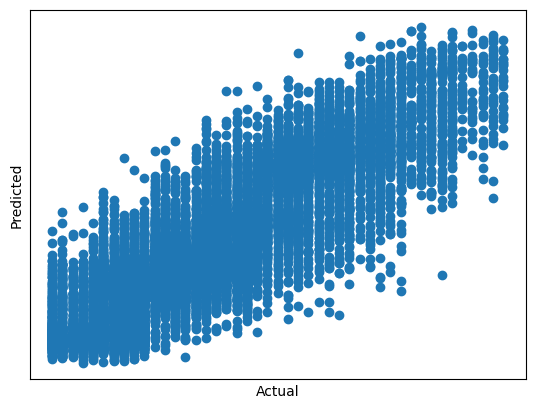

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.xticks(())
plt.yticks(())

plt.show()


SyntaxError: cannot assign to literal (3346623659.py, line 1)